In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import seaborn as sns

# General statistics and analysis on sheep dataset
---
I need to run some of the base-level comparisons on the sheep contigs. I want to plot contig length comparisons, coverage by completeness plots and some other metrics. Let's list the comparisons I want to run:

* Contig lengths per taxonomic group
* Taxonomic group venn comparison
* Circular contig alignment to CLR datasets
* GC percent of contigs vs bins
* Bin taxa representation

I will probably add more over time!

---

## Taxonomic Venn

First, let's start with the low hanging fruit and compare taxonomic intersections among the assemblies. I already did this via text comparisons, but let's see how this looks in an upset plot.

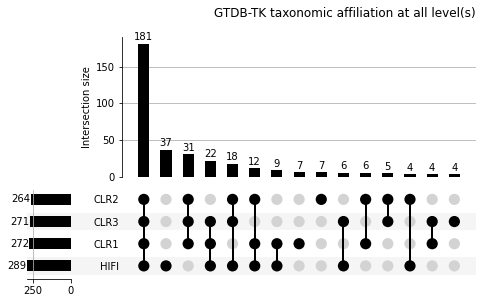

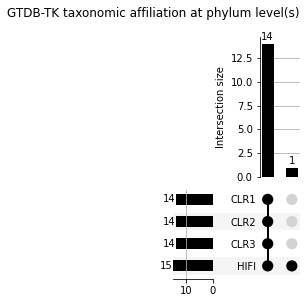

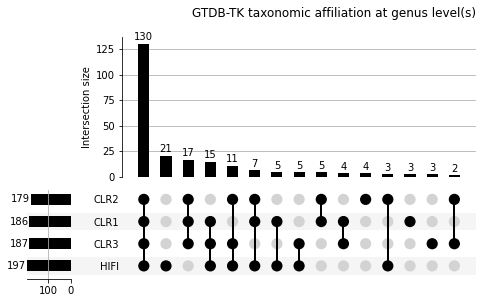

In [2]:
import upsetplot

# Dictionary for all set memberships. Outer keys are for "all" "phylum", and "genus". Inner keys are the files
tdata = defaultdict(dict)
universe = defaultdict(list)

convert = {"flye4" : "HIFI", "clr1" : "CLR1", "clr2" : "CLR2", "clr3" : "CLR3"}
for t in ("flye4", "clr1", "clr2", "clr3"):
    g = convert[t]
    for c in ("all", "phylum", "genus"):
        tdata[c][g] = set()
    with open("C:/SharedFolders/metagenomics/tim_sheep/taxonomy/{}.tax.list".format(t), 'r') as input:
        for l in input:
            l = l.rstrip()
            segs = l.split(';')
            
            tdata["all"][g].add(l)
            universe["all"].append(l)
            tdata["phylum"][g].add(segs[1])
            universe["phylum"].append(segs[1])
            tdata["genus"][g].add(segs[5])
            universe["genus"].append(segs[5])
            
# Now that everything's loaded, let's start plotting!
for c in ("all", "phylum", "genus"):
    complist = list()
    for t in ("HIFI", "CLR1", "CLR2", "CLR3"):
        complist.append(tdata[c][t])
    
    upsetlist = upsetplot.from_contents(tdata[c])
    upset = upsetplot.UpSet(upsetlist, sort_by='cardinality', show_counts='%d')
    upset.plot()
    plt.title(f'GTDB-TK taxonomic affiliation at {c} level(s)', loc='right', pad=20)
    plt.savefig(f'C:/SharedFolders/metagenomics/tim_sheep/taxonomy/gtdb-tk.upsetplots.{c}.pdf')

### Contig level statistics

I want to see if I can create some contig level statistical plots to show differences between the HIFI and CLR datasets. Let's start with the master tables and work from there.

<Figure size 576x432 with 0 Axes>

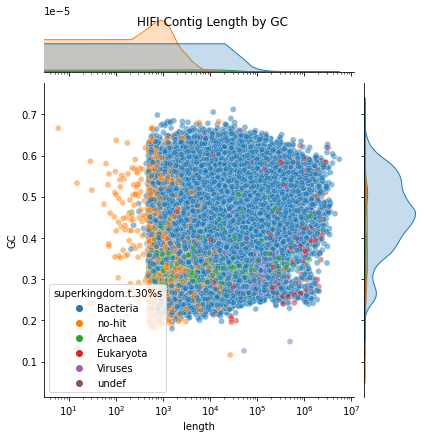

<Figure size 576x432 with 0 Axes>

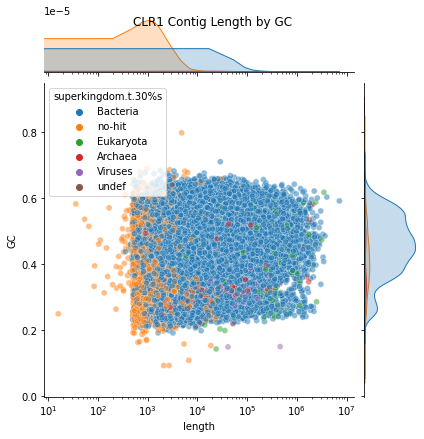

<Figure size 576x432 with 0 Axes>

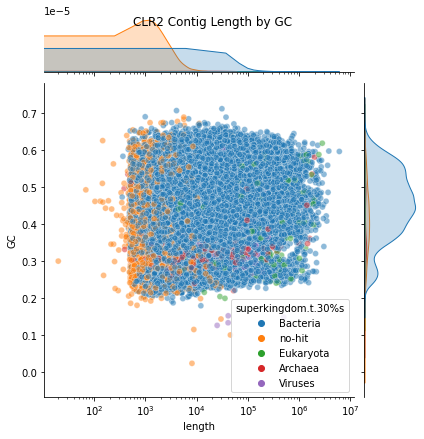

<Figure size 576x432 with 0 Axes>

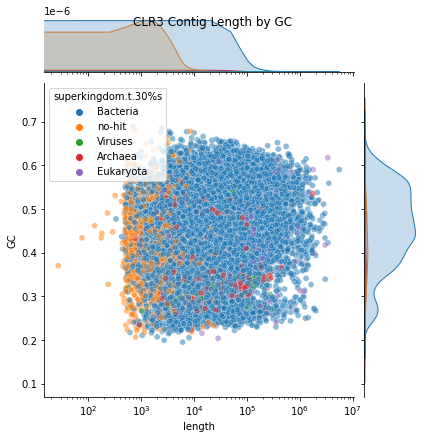

In [3]:
datasets = {"HIFI" : "C:/SharedFolders/metagenomics/tim_sheep/master_tables/flye4_master_table_12_2020.tab",
            "CLR1" : "C:/SharedFolders/metagenomics/tim_sheep/master_tables/clr1_master_table_12_2020.tab",
            "CLR2" : "C:/SharedFolders/metagenomics/tim_sheep/master_tables/clr2_master_table_12_2020.tab",
            "CLR3" : "C:/SharedFolders/metagenomics/tim_sheep/master_tables/clr3_master_table_12_2020.tab"}
dfs = dict()
for k, v in datasets.items():
    dfs[k] = pd.read_csv(v, sep="\t")


for k, v in dfs.items():
    f = plt.figure(figsize=(8,6))
    labels = {"Bacteria" : 'b', "Archaea" : 'g', "Viruses" : 'r', "Eukaryota" : 'm', 'no-hit' : 'y'}

        
    #ax = dfs["HIFI"][["length", "GC"]].plot.scatter(x = "length", 
    #                                                y = "GC", c=[labels.get(x, 'y') for x in dfs["HIFI"]["superkingdom.t.30%s"]], 
    #                                                alpha = 0.5)
    ax = sns.jointplot(data=dfs[k], x="length", y="GC", hue="superkingdom.t.30%s", alpha=0.5)
    ax.fig.suptitle(f'{k} Contig Length by GC')
    ax.ax_joint.set_xscale('log')

In [4]:
# columns = completeORFs, PartialORFs, length, Assembly
orfs = defaultdict(list)
for k, v in dfs.items():
    print(v.columns)
    for j in ['CompleteORFs', 'PartialORFs', 'length']:
        orfs[j].extend(v[j])
    orfs['Assembly'].extend([k for x in range(len(v['CompleteORFs']))])
    
orfdb = pd.DataFrame(orfs)
orfdb[orfdb.length > 1000].groupby(by="Assembly").describe()

Index(['#_name', 'length', 'GC', 'cov4', 'cov5', 'cov6', 'cov7',
       'superkingdom.t.30%s', 'phylum.t.33%s', 'order.t.36%s', 'family.t.39%s',
       'genus.t.42%s', 'species.t.45%s', 'Bin3cBin', 'CompleteORFs',
       'PartialORFs', 'ViralContig', 'ViralClass', 'CtgCheckM', 'DasToolComp',
       'DasToolCont', 'CLR1BinID', 'CLR1MashDist', 'CLR1GTDBTax', 'CLR2BinID',
       'CLR2MashDist', 'CLR2GTDBTax', 'CLR3BinID', 'CLR3MashDist',
       'CLR3GTDBTax', 'Flye4GTDBTax'],
      dtype='object')
Index(['#_name', 'length', 'GC', 'cov12', 'cov13', 'cov14', 'cov15',
       'superkingdom.t.30%s', 'phylum.t.33%s', 'order.t.36%s', 'family.t.39%s',
       'genus.t.42%s', 'species.t.45%s', 'Bin3cBin', 'CompleteORFs',
       'PartialORFs', 'ViralContig', 'ViralClass', 'CheckMComp', 'CheckMCont',
       'DasToolComp', 'DasToolCont'],
      dtype='object')
Index(['#_name', 'length', 'GC', 'cov16', 'cov17', 'cov18', 'cov19',
       'superkingdom.t.30%s', 'phylum.t.33%s', 'order.t.36%s', 'family.t.3

CompleteORFs                                                        \
                count       mean         std  min   25%   50%   75%     max   
Assembly                                                                      
CLR1          48334.0  74.898808  158.731398  0.0   7.0  31.0  79.0  5766.0   
CLR2          48790.0  75.626132  161.253558  0.0   7.0  31.0  79.0  5584.0   
CLR3          24315.0  82.883035  160.749596  0.0  11.0  43.0  91.0  4482.0   
HIFI          57256.0  58.157870  177.070003  0.0   4.0  14.0  44.0  4411.0   

         PartialORFs            ...             length                \
               count      mean  ...  75%  max    count          mean   
Assembly                        ...                                    
CLR1         48334.0  0.750900  ...  1.0  2.0  48334.0  61754.504634   
CLR2         48790.0  0.775302  ...  1.0  2.0  48790.0  61661.387928   
CLR3         24315.0  0.903640  ...  1.0  2.0  24315.0  68915.251779   
HIFI         57256.0  1.155442  ...  2.0  2.0  57256.0  59809.718964   

                                                                         
                    std     min       25%      50%       75%        max  
Assembly                                                                 
CLR1      158810.782120  1001.0   6034.50  23646.5  55086.50  7141023.0  
CLR2      159437.994227  1001.0   6054.00  23121.5  54552.75  6067615.0  
CLR3      163346.658411  1001.0  10247.00  34266.0  64689.50  5583265.0  
HIFI      192075.704295  1001.0   5433.75  15287.0  41081.00  5546585.0  

[4 rows x 24 columns]

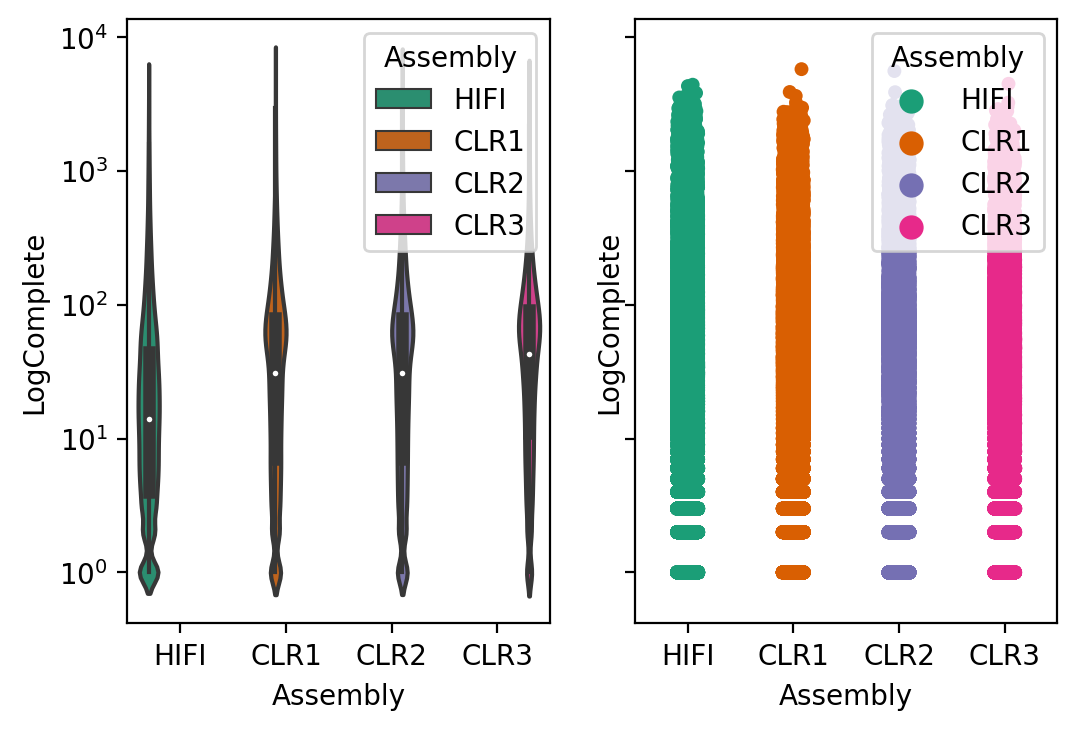

In [5]:
plt.rcParams['figure.dpi'] = 200

# First, the Complete vs partial orf comparisons
orfdb['LogComplete'] = [np.log10(x) if x != 0 else 0 for x in orfdb['CompleteORFs']]
fig, ax = plt.subplots(1,2, sharey=True)
sns.violinplot(y="LogComplete", x="Assembly", hue="Assembly", data=orfdb[orfdb.length > 1000], palette="Dark2", ax=ax[0])
sns.stripplot(y="LogComplete", x="Assembly", hue="Assembly", data=orfdb[orfdb.length > 1000], palette="Dark2", ax=ax[1])
ax[0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

<AxesSubplot:xlabel='Assembly', ylabel='PartialORFs'>

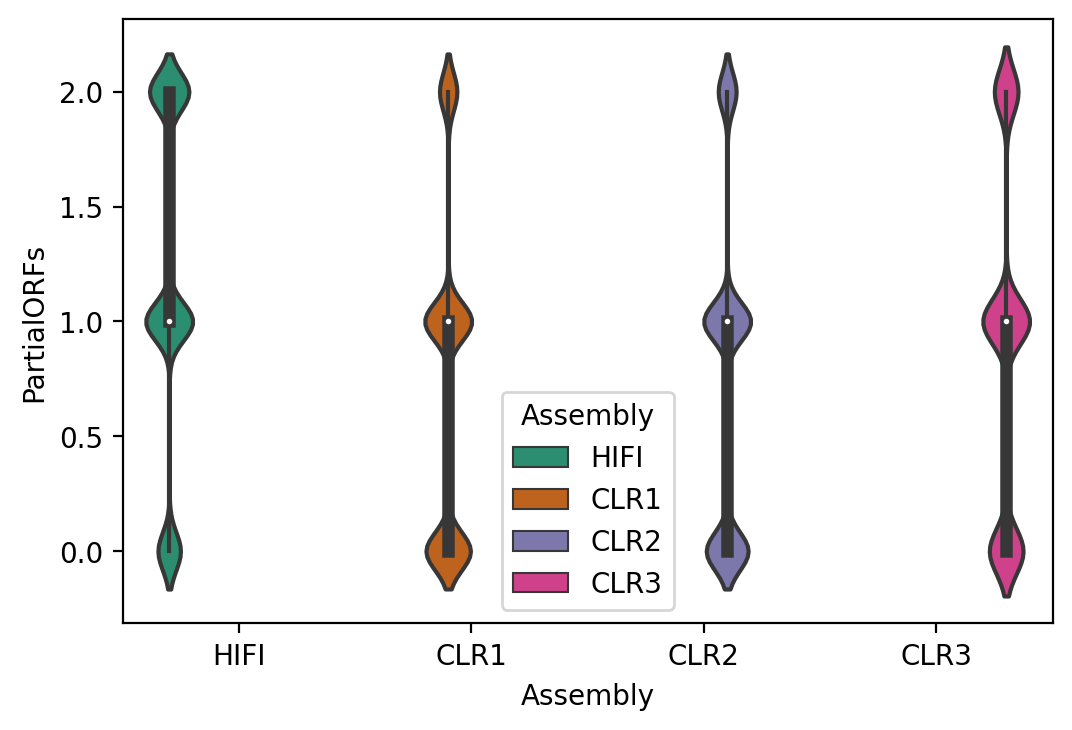

In [6]:
# Now the partial orfs
sns.violinplot(y="PartialORFs", x="Assembly", hue="Assembly", data=orfdb[orfdb.length > 1000], palette="Dark2")
#sns.stripplot(y="PartialORFs", x="Assembly", hue="Assembly", data=orfdb[orfdb.length > 1000], palette="Dark2", ax=ax[1])

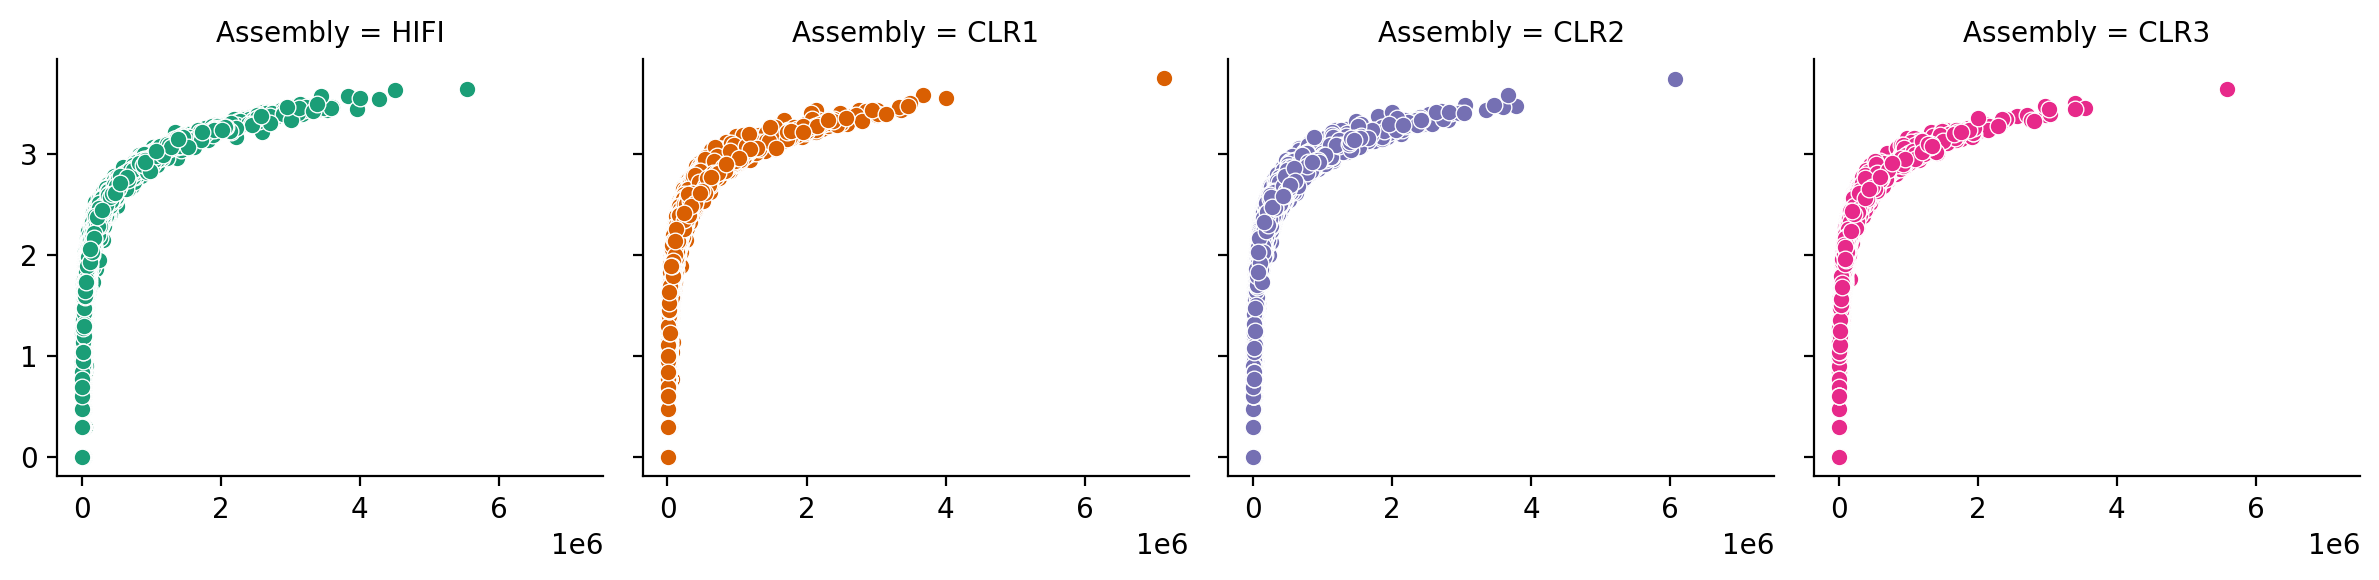

In [7]:
# Now CompleteORFs by length
g = sns.FacetGrid(orfdb[orfdb.length > 1000], col="Assembly", hue='Assembly', palette='Dark2')
g.map_dataframe(sns.scatterplot, x='length', y='LogComplete')

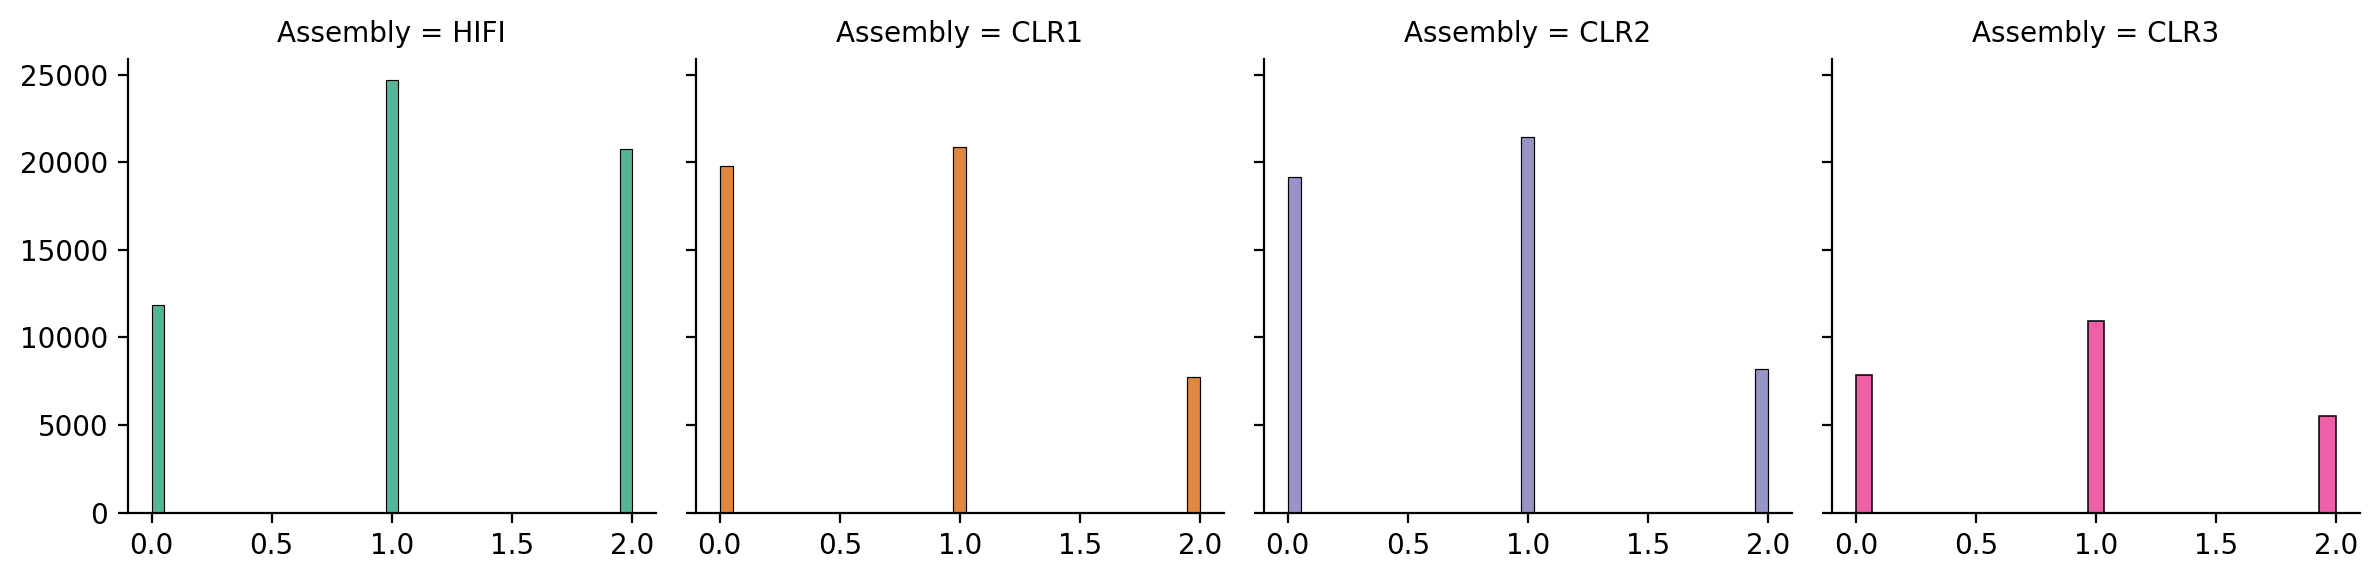

In [8]:
# And partial orfs by length
g = sns.FacetGrid(orfdb[orfdb.length > 1000], col="Assembly", hue='Assembly', palette='Dark2')
g.map_dataframe(sns.histplot, x='PartialORFs')

---
## Coverage level statistics 

OK now I need to set up several convenience variables. Such as "is the contig binned?" and a sum of the coverage values for plotting. We'll start by modifying dataframes to collect and count average coverage and then use that to determine coverage per bin.

In [9]:
bincoverage = defaultdict(list)
for k, v in dfs.items():
    for j in ['length', 'GC', 'Bin3cBin']:
        bincoverage[j].extend(v[j])
        
    covsum = v.iloc[:,3:7].sum(axis=1).tolist()
    bincoverage['Cov'].extend(covsum)
    bincoverage['Assembly'].extend([k for x in covsum])
    
covdf = pd.DataFrame(bincoverage)
covdf = covdf[covdf['Bin3cBin'] != "NOBIN"]
print(covdf.shape)
covdf.head()

(21656, 5)


,length,GC,Bin3cBin,Cov,Assembly
8,4834,0.3504,bin3c.14,37.9616,HIFI
14,371218,0.6181,bin3c.161,29.4185,HIFI
17,554296,0.4514,bin3c.273,3.9689,HIFI
23,3067,0.3277,bin3c.556,11.0564,HIFI
26,9907,0.3728,bin3c.556,17.8717,HIFI


(0.0, 50.0)

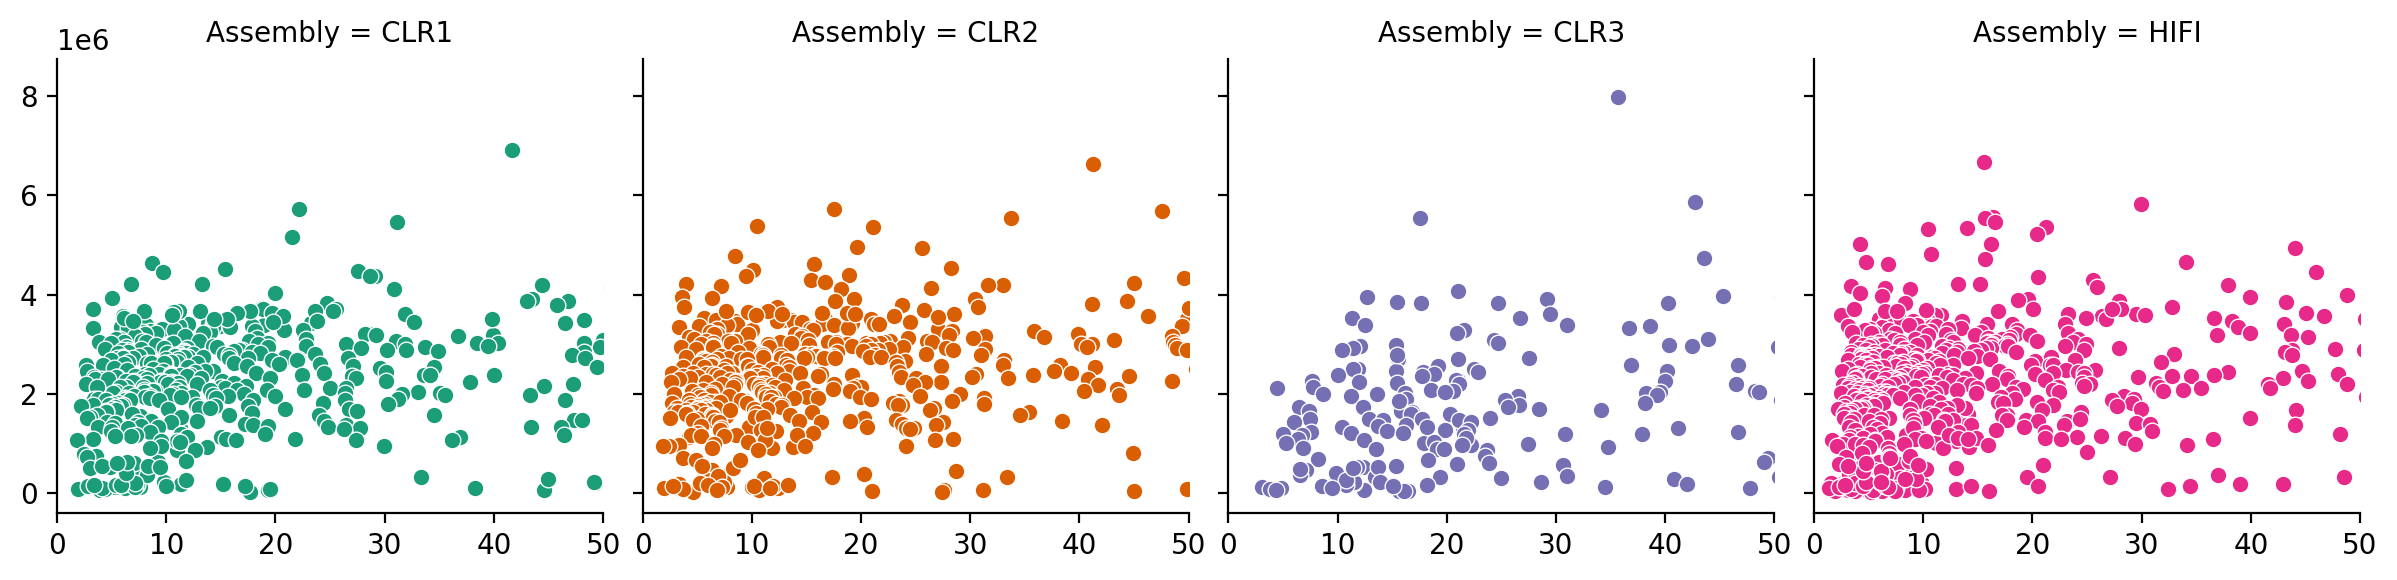

In [10]:
# {'length' : [pd.Series.nunique, np.sum], 'GC' : np.mean, 'Cov' : np.mean}
groupCov = covdf.groupby(by=['Assembly', 'Bin3cBin']).agg(count=('length', 'nunique'), totlen=('length', 'sum'), avggc=('GC', 'mean'), avgCov=('Cov', 'mean'), stdCov=('Cov', 'std'))
groupCov.to_csv("C:/SharedFolders/metagenomics/tim_sheep/master_tables/combined_per_bin_averagecount.tab", sep="\t")

g = sns.FacetGrid(groupCov.reset_index(), col="Assembly", hue='Assembly', palette='Dark2')
g.map_dataframe(sns.scatterplot, x='avgCov', y='totlen')
plt.xlim(0, 50)

(0.0, 500.0)

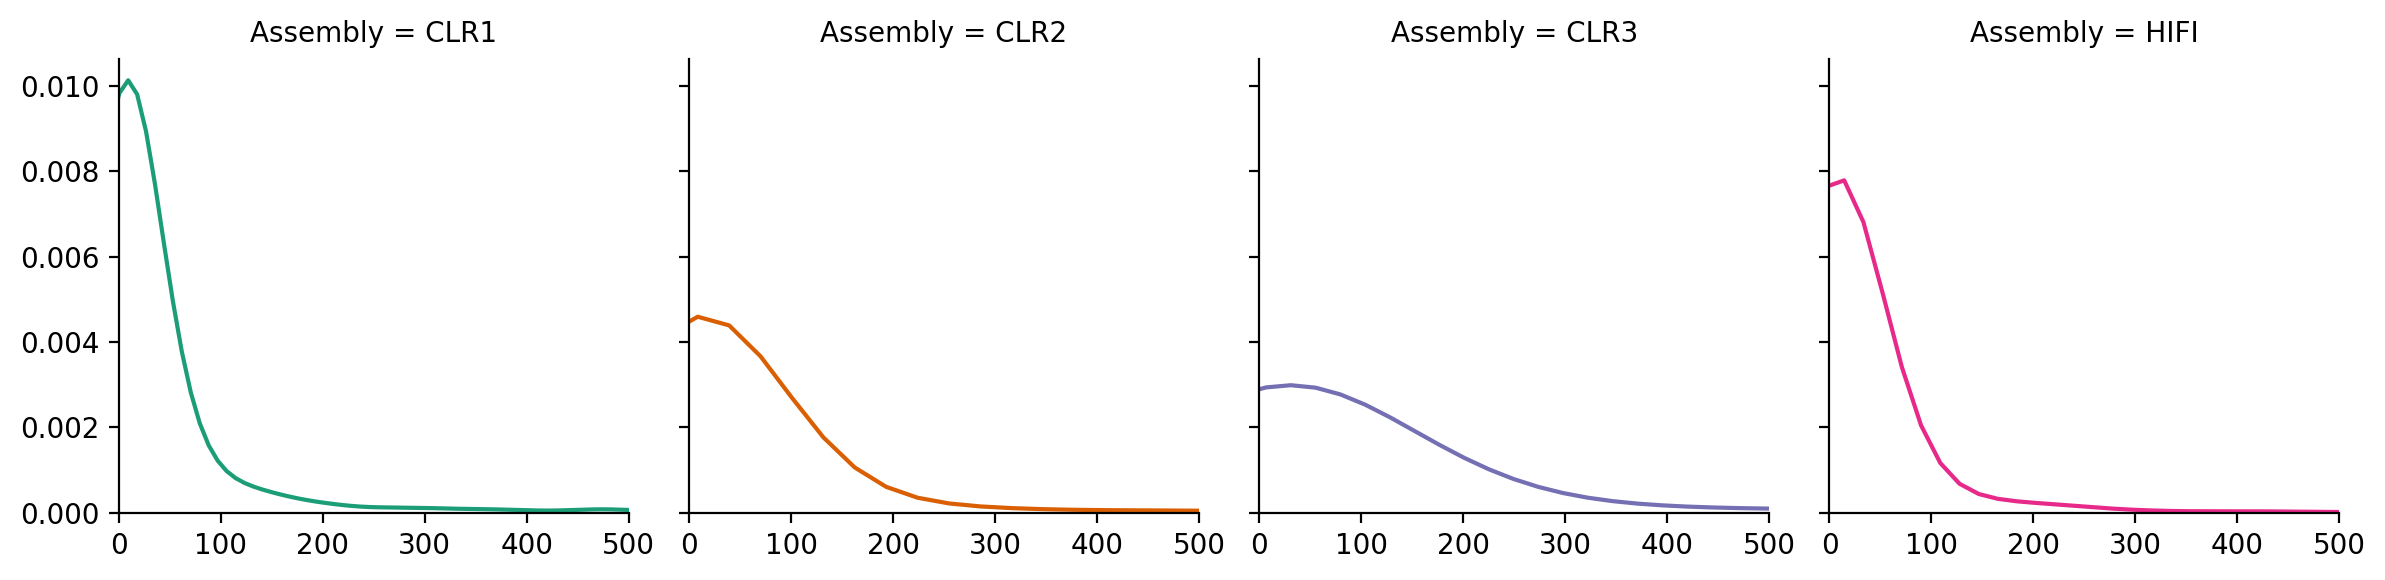

In [11]:
# Now to plot stdev of coverage values
g = sns.FacetGrid(groupCov.reset_index(), col="Assembly", hue='Assembly', palette='Dark2')
g.map_dataframe(sns.kdeplot, x='stdCov')
plt.xlim(0, 500)

## Mash distance ortholog detection
---

Using the mash distance association data I created earlier, I am going to try to create bipartite plots that show the correspondence between the HiFi assembly and each CLR dataset.

clr1
clr2
clr3


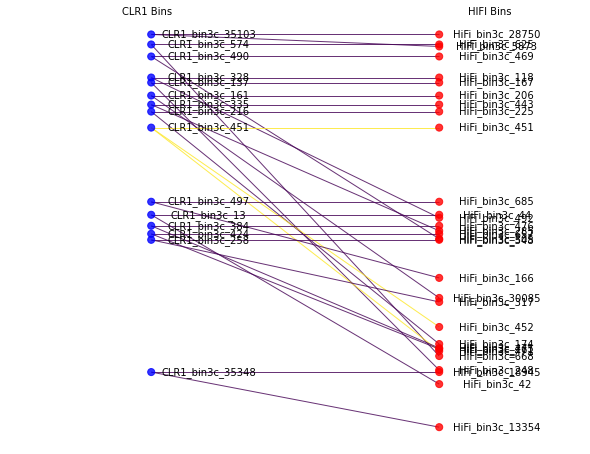

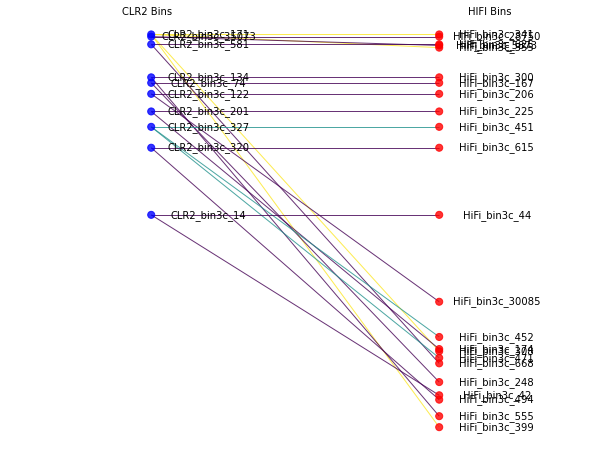

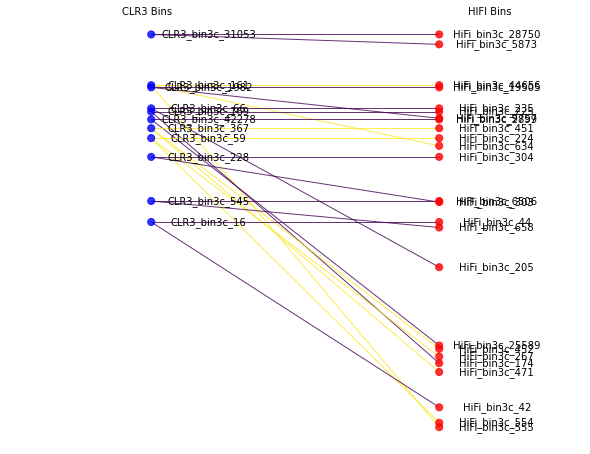

In [3]:
df = pd.read_csv("C:/SharedFolders/metagenomics/tim_sheep/strain_determination/flye4_strain_associations_filt.table", sep='\t', index_col=False, header=(0))

#print(df.head())

# cols = clr count
assocs = defaultdict(list)

for a in ("clr1", "clr2", "clr3"):
    tdf = df[df[a + '_bin'].notna()].copy()
    tdf = tdf[~tdf[a + '_bin'].str.contains(r';')]
    
    #print(tdf.head())
    tdf['Refbin'] = 'HiFi_' + tdf['Refbin']
    tdf[a + '_bin'] = a.upper() + '_' + tdf[a + '_bin']
    print(a)
    #print(tdf.head())
    f = plt.figure(figsize=(8,6))
    
    refdic = defaultdict(int)
    clrdic = defaultdict(int)
    for i in tdf['Refbin']:
        refdic[i] += 1
    for i in tdf[a + '_bin']:
        clrdic[i] += 1
    
    tdf['values'] = [max(refdic[x], clrdic[y]) for x, y in zip(tdf['Refbin'], tdf[a + '_bin'])]
    #print(tdf.head())
    
    G = nx.Graph()
    G.add_nodes_from(tdf.loc[tdf['values'] > 1, 'Refbin'], node_color='r', bipartite=0)
    G.add_nodes_from(tdf.loc[tdf['values'] > 1, a + '_bin'], node_color='b', bipartite=1)
    
    G.add_weighted_edges_from([(row[a + '_bin'], row['Refbin'], row['values']) for idx, row in tdf[tdf['values'] > 1].iterrows()], weight='weight')
    for idx, row in tdf[tdf['values'] > 0].iterrows():
        assocs['refbin'].append(row['Refbin'])
        assocs['clr'].append(a.upper())
        assocs['count'].append(row['values'])
        
    #print(G.edges(data=True))
    
    edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    #edgecolors = ['b' if b > 1 else 'm' for b in weights]
    nodes, colors = zip(*nx.get_node_attributes(G, 'node_color').items())
    
    pos = {node:[0.25, i + 1] for i,node in enumerate(tdf[a + '_bin'])}
    pos.update({node:[0.75, i + 1] for i,node in enumerate(tdf['Refbin'])})
    nx.draw(G, pos, node_size = 50, alpha = 0.8, node_color=colors, edgelist=edges, edge_color=weights, edge_cmap=plt.cm.viridis, with_labels=False)
    #nx.draw(G, pos, node_color=colors, edgelist=edges, edges_color=edgecolors, with_labels=False)
    
    for p in pos:  # move text positions
        h = -0.10 if p.startswith('clr') else 0.10
        pos[p][0] += h
        pos[p][1] += 0.10
    nx.draw_networkx_labels(G, pos, font_size= 10)
    plt.gca().set_xlim(0, 1)
    ymin, ymax = plt.gca().get_ylim()
    plt.text(0.20, ymax, a.upper() + " Bins")
    plt.text(0.80, ymax, "HIFI Bins")
    
    plt.savefig(f'C:/SharedFolders/metagenomics/tim_sheep/binning/{a}.multi.bin.mash.pdf')

      count                                             
      count      mean       std  min  25%  50%  75%  max
clr                                                     
CLR1  401.0  1.084788  0.304619  1.0  1.0  1.0  1.0  3.0
CLR2  380.0  1.089474  0.401047  1.0  1.0  1.0  1.0  4.0
CLR3  390.0  1.087179  0.355044  1.0  1.0  1.0  1.0  3.0

count    1   2  3  4
clr                 
CLR1   370  28  3  0
CLR2   357  16  3  4
CLR3   365  16  9  0


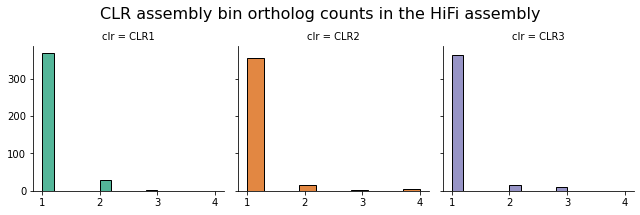

In [4]:
assocDF = pd.DataFrame(assocs)
g = sns.FacetGrid(assocDF, col="clr", hue='clr', palette='Dark2')
g.map_dataframe(sns.histplot, x='count')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('CLR assembly bin ortholog counts in the HiFi assembly', fontsize=16)

plt.savefig("C:/SharedFolders/metagenomics/tim_sheep/binning/mash.ortholog.counts.pdf")

print(assocDF.groupby('clr').describe())
print()
print(assocDF.pivot_table(index='clr', columns='count', aggfunc='size', fill_value=0))

## Example Clostridia multiplot
---

I want to make the magphase plot look a bit more palatable for a figure.

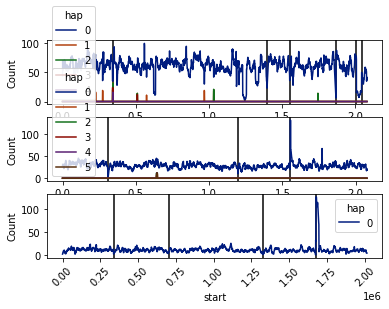

In [5]:
fig, axs = plt.subplots(3)
for i, file in enumerate(["451", "452", "471"]):
    tdf = pd.read_table("C:/SharedFolders/metagenomics/tim_sheep/strain_determination/example_clostridia/flye4.bin3c." + file + ".nolines.wins", sep="\t", header=0)
    
    breaks = []
    last = "NO"
    for j, row in tdf.iterrows():
        if last == "NO":
            last = row['contig']
            continue
        elif last != row['contig']:
            breaks.append(row['start'])
        last = row['contig']
        
    tdata = tdf[['start','hap','count']].pivot_table(index='start', columns='hap', values='count', fill_value=0, aggfunc='sum').unstack().to_frame().rename(columns={0:'Count'})
    sns.lineplot(data=tdata, x='start', y='Count', hue='hap', ax=axs[i], palette='dark')
    plt.xticks(rotation=45)
    
    if len(breaks) > 1:
        for b in breaks:
            axs[i].axvline(b, ls='-', c='k', zorder=-1)
            
plt.savefig("C:/SharedFolders/metagenomics/tim_sheep/strain_determination/example_clostridia/flye4.combined.clostridia.plots.pdf")

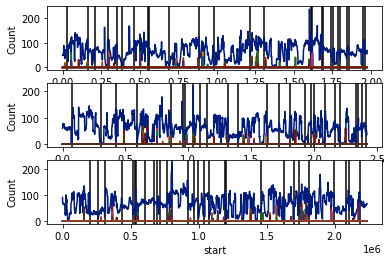

In [6]:
# Now for the CLR bins
fig, axs = plt.subplots(3)
for i, file in enumerate(["clr1.bin3c.451.nolines.wins", "clr2.bin3c.327.nolines.wins", "clr3.bin3c.367.nolines.wins"]):
    tdf = pd.read_table("C:/SharedFolders/metagenomics/tim_sheep/strain_determination/example_clostridia/" + file, sep="\t", header=0)
    
    breaks = []
    last = "NO"
    for j, row in tdf.iterrows():
        if last == "NO":
            last = row['contig']
            continue
        elif last != row['contig']:
            breaks.append(row['start'])
        last = row['contig']
        
    tdata = tdf[['start','hap','count']].pivot_table(index='start', columns='hap', values='count', fill_value=0, aggfunc='sum').unstack().to_frame().rename(columns={0:'Count'})
    sns.lineplot(data=tdata, x='start', y='Count', hue='hap', ax=axs[i], palette='dark')
    
    if len(breaks) > 1:
        for b in breaks:
            axs[i].axvline(b, ls='-', c='k', zorder=-1)
            
for a in axs:
    a.get_legend().remove()
plt.savefig("C:/SharedFolders/metagenomics/tim_sheep/strain_determination/example_clostridia/clr.combined.clostridia.plots.pdf")